# **Lab 5: Integration**
**Kevin Arnmark**

# **Abstract**

In this report I demonstrate different ways of approximating integrals. I am implementing the 2-point Gauss quadrature, 3-point edge midpoint quadrature and the Monte Carlo quadrature

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Kevin Arnmark (karnmark@kth.se)

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.



'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [2]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import random

from scipy import integrate # For testing the accuracy of the algorithms

from matplotlib import pyplot as plt

# **Introduction**

In this report I implement the following functions:

1. **Function:** 2-point Gauss quadrature over a unit interval 

  **Input:** function f(x) 

  **Output:** quadrature approximation of integral $\int_0^1 f(x) dx$

  **Test:** verify exact integration of cubic polynomials $ax^3 + bx^2 + cx + d$


2. **Function:** 3-point edge midpoint quadrature over a reference triangle

  **Input:** function f(x) 

  **Output:** quadrature approximation of integral $\int_{ref-triangle} f(x) dx$

  **Test:** verify exact integration of quadratic polynomials $ax^2 + by^2 + cxy + dx + ey + f$


3. **Function:** Monte Carlo quadrature over a unit interval

  **Output:** MC quadrature approximation of integral $\int_0^1 f(x) dx$

  **Test:** verify convergence rate $1/sqrt(n)$ with respect to number of quadrature points n. 


Function 1 and 2 can be solved by calculating weights $w_i$ and quadrature points $x_i$ for the intervals. The approximation is given by: $\int_a^b f(x) dx \approx \sum_{i=0}^q f(x_i)w_i$, where $f(x)$ is the integrand and $q$ is the polynomial degree.

The Monte Carlo quadrature is given by: $\int_D g(x) dx \approx \frac{\lvert D \rvert}{n}\sum_{i=1}^n g(x_i)$ (Equation 12.4 in Chapter 12.5)


# **Method**

**2-point Gauss quadrature over a unit interval**

In example 11.3 the 2-point gauss rule is given by $w_0 = w_1 = 1, x_0 = 1/\sqrt{3} $ and $x_1 = -1/\sqrt(3)$ on the interval $[-1, 1]$ and is defined by the Legendre polynomial $P_2$. 

For other intervals the weights and quadrature points can be calculated as: $w_0=w_1= \frac{b - a}{2}, x_0=\frac{b - a}{2}(\frac{-1}{\sqrt{3}}) + \frac{b + a}{2}, x_1=\frac{b - a}{2}(\frac{1}{\sqrt{3}}) + \frac{b + a}{2}$. 

For the unit interval $[0, 1]$ $w_0 = w_1 = 1/2$ and $x_0 = \frac{\sqrt{3} - 1}{2\sqrt{3}}, x_1 = \frac{\sqrt{3} + 1}{2\sqrt{3}}$

For the 2-point Gauss quadrature all polynomials up to the degree of 3 are exact. 

In [117]:
def gauss_quad(fnc):
  w = 1/2
  x0 = (np.sqrt(3) - 1)/(2*np.sqrt(3))
  x1 = (np.sqrt(3) + 1)/(2*np.sqrt(3))
  return w*fnc(x0) + w*fnc(x1)

**3-point edge midpoint quadrature over a reference triangle**

As defined in example 11.5, the weights are $w_0 = w_1 = w_2 = 1/6$ and the quadrature points are the midpoints of the three edges of the reference triangle, $x_0 = [0.5, 0], x_1 = [0, 0.5], x_2 = [0.5, 0.5]$

For the 3-point edge midpoint quadrature all polynomials up to degree 2 are exact.

In [118]:
def midpoint_quad(fnc):
  w = 1/6
  x0 = [0.5, 0]
  x1 = [0, 0.5]
  x2 = [0.5, 0.5]
  return w*(fnc(x0[1],x0[0]) + fnc(x1[1],x1[0]) + fnc(x2[1],x2[0]))

**Monte Carlo quadrature over a unit interval**

The Monte Carlo approximation is given by:

$\int_D g(x) dx \approx \frac{\lvert D \rvert}{n}\sum_{i=1}^n g(x_i)$, where $n$ is the number of random samples and $g : D \rightarrow R, D \subset R^d$. (Equation 12.4 in Chapter 12.5)

I am using the python module random to get an uniformly random number in the interval $[0, 1]$.

$\lvert D \rvert = 1$, since the domain is the interval $[0,1]$

In [119]:
def mc_quad(fnc, n):
  x = [random.random() for _ in range(n)]
  return (1/n) * sum([fnc(x[i]) for i in range(n)])

# **Results**

To test the accuracy of these algorithms I created functions that generates a random polynomial of degree n. The integral approximations are compared with the integrate functions of the scipy module. 

Gauss tests passed
Midpoint tests passed


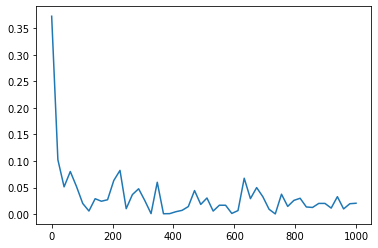

In [128]:
def get_random_func(n): # Generating random polynomial of degree n
  n += 1
  stop = 100
  start = -stop
  rand = [random.randrange(start, stop)*random.random() for _ in range(n)]
  def f(x):
    value = 0
    #polynomial = "" # For debugging
    for i in range(n):
      value += rand[i] * x**i
      #polynomial += str(rand[i]) + " * x**" + str(i) + " + " # For debugging
    #print(polynomial) # For debugging
    return value
  return f

# Testing for verifying exact solution of polynomial of third degree on Gauss quadrature

for i in range(10):
  function = get_random_func(random.randrange(1, 4)) # Testing polynomials up to degree 3
  np.testing.assert_almost_equal(gauss_quad(function), integrate.quad(function, 0, 1)[0])

print("Gauss tests passed")

# Testing the 3-point midpoint quadrature algorithm
def get_random_func_yx(): # Generating random polynomial of degree 2
  stop = 100
  start = -stop
  rand = [random.randrange(start, stop)*random.random() for _ in range(6)]
  def f_yx(y, x):
    return rand[0]*x**2 + rand[1]*y**2 + rand[2]*x*y + rand[3]*x + rand[4]*y + rand[5]
  return f_yx

for i in range(10):
  function = get_random_func_yx() # Get random polynomial
  np.testing.assert_almost_equal(midpoint_quad(function), integrate.dblquad(function, 0, 1, 0, lambda x: -x + 1)[0])

print("Midpoint tests passed")


# Testing the convergence of the monte carlo quadrature algorithm
"""
Taking the average of avg_n approximations of mc_quad up to n samples and plotting 
the approximation error.
"""

function = get_random_func(6) # Generating random polynomial of degree 6
n = 1000
steps = 50
x = np.linspace(0, n, steps)
integr = integrate.quad(function, 0, 1)[0]
y = []
j = 0
for samples in range(1, n+1, int(n/steps)):
  avg = 0
  avg_n = 1000
  for i in range(avg_n):
    avg += mc_quad(function, samples)
  avg = avg / avg_n
  y.append(abs(integr - avg)) # Adding the error of the approximation
  j += 1

plt.plot(x, y)
plt.show()


# **Discussion**

I was impressed that the integrals could be approximated exactly up to a certain polynomial with such minimal calculations. The results I got confirms this. 

To see and confirm the convergence rate of the Monte Carlo quadrature, I believe I would need to run alot more tests. I believe the variance is too large for the convergence to be apparent in the results.